<a href="https://colab.research.google.com/github/ae3wc/IP-Lookup/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# of times for first coin: 0.7
# of random coin: id(341)-freq(0.9)
Freq coin with Min: id(8)-freq(0.0)


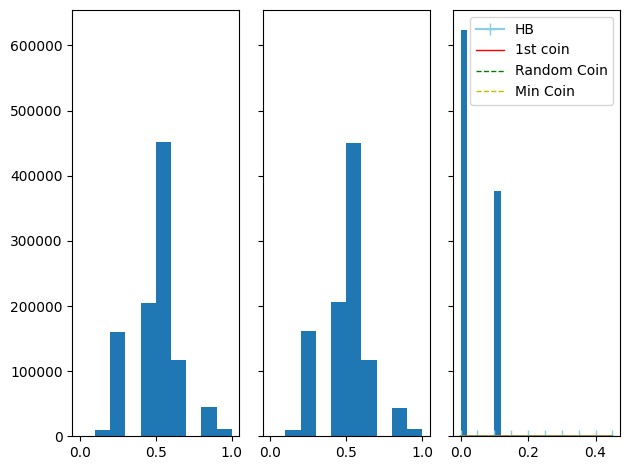

In [4]:
## for running each part you can uncomment, and run. Now Part b is commented

# Exercise 1.10
# part a
import numpy as np
import matplotlib.pyplot as plt


# this functio flip coins by choosing random number between 0, and 1, if the value
# is greater than 0.5 return 1 which is H, otherwise return 0 which is T
def flip_coins(total_coins):
    res = np.zeros(total_coins) #head: 1, tail: 0, default is 0
    probs = np.random.uniform(size=total_coins)
    res[probs > 0.5] = 1
    return res
# it receives # of coin, and flips, then print frequence for first, and random coin
def run_once_only(total_coins, total_flips, printt):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    HtS_sum = np.zeros(total_coins) # store the sum of heads in total_flips, initial with 0

    for flip in range(total_flips):
        HtS_sum = HtS_sum + flip_coins(total_coins)# flip, and add value to HtS_Sum

    HtS_freq = HtS_sum/total_flips # calculate freq

    v1 = HtS_freq[0] # 1st
    vrand = HtS_freq[crand] # rand
    Minimum = np.argmin(HtS_sum) # minimum
    vmin = HtS_freq[Minimum]

    # for use case of Part b, if called with 1, print, else not print
    if printt:
      print(f'# of times for first coin: {v1}')
      print(f'# of random coin: id({crand})-freq({vrand})')
      print(f'Freq coin with Min: id({Minimum})-freq({vmin})')
    return v1,vrand,vmin
alltimes = 1000
allflips = 10
run_once_only(alltimes, allflips,1)

#  Part b
all_coins = 1000
all_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]

# run 1000000 time, call run_once Only, and addthree values to v1s, also vmin to vmins, and vrands
for run in range(total_runs):
    v1,vrand,vmin = run_once_only(all_coins, all_flips,0)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

# then plot v1s, vrands, and vmins, by histogram, bin is 10
fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
# histogram of three different bin
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)
##########################################################

# Part C
# function to define HB, receive e, and N then return HB
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

# Set epsilon array from 0 to 0.5, step 0.05
eps = np.arange(0.0,0.5,0.05)
# call HB for bound
bounds = hoeffding_bound(eps, all_flips)
# make array from v1s, vrands, and vmins
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
# compute |v-miu| for each sample and put them to d array (v1d,vrandd, and vmind)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

# generate p1, prand, and pmin with lengh of eps, filled with zero
p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

# for each eps member, calculate estimate value with HB, and set in pXXX array. v1d-ep/N as function of ep
# for 1st, rand, and min respectively.
for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

 # draw plots by values of distribution of functions, x-axis is eps, and y is distribution
plt.plot(eps, bounds, marker='+', markerfacecolor='blue', markersize=8, color='skyblue', label='HB')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='1st coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Min Coin')
plt.legend()

In [ ]:
# problem 1.4
import numpy as np
import matplotlib.pyplot as plt

def perceptron(X, Y, max_epochs=1000):
    num_updates = 0
    n = len(X)
    weights = np.zeros(len(X[0]))
    bias = 0

    for epoch in range(max_epochs):
        converged = True
        for i in range(n):
            if Y[i] * (np.dot(X[i], weights) + bias) <= 0:
                weights += Y[i] * X[i]
                bias += Y[i]
                num_updates += 1
                converged = False
        if converged:
            break

    return weights, bias, num_updates

def hypothesis_function(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    # Run perceptron learning
    weights, bias, _ = perceptron(X, Y)

    if len(weights) == 1:
        slope = -weights[0]
        intercept = -bias
        return lambda x: slope * x + intercept
    else:
        slope = -weights[0] / weights[1]
        intercept = -bias / weights[1]
        return lambda x: slope * x + intercept

def plot_hypothesis(X, Y, labels, target_function, hypothesis):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='r', marker='o', label='Class 1')
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='b', marker='o', label='Class -1')
    plt.plot(target_function[:, 0], target_function[:, 1], color='g', label='Target Function: y = 3x - 4')

    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    plt.plot(x_vals, hypothesis(x_vals), color='m', label='Final Hypothesis')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Linearly Separable Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()

# this function receive n, and generate sample data
def generate_samples(n):
    np.random.seed(0)
    X = np.random.randint(2, 80, size=(n, 1))  # Generate n random integer x-values between 2 and 20
    Y = 3 * X.squeeze() - 4  # Compute corresponding y-values using the target function
    noise = np.random.randint(-100, 100, size=n)  # Generate integer noise
    Y += noise  # Add noise to simulate real data
    labels = np.where(X.squeeze() * 3 - 4 > Y, 1, -1)  # Assign labels based on whether points fall to the right or left of the line
    samples = [(x[0], y) for x, y in zip(X, Y)]  # Combine X and Y into a list of (x, y) coordinates
    return samples, labels.tolist()

# Problem 1.4 part a, b, for c, and d just set n to 100, and 1000
n=100 # sample data set size
X, Y = generate_samples(n)
# Generate target function points for plotting
target_function_x = np.linspace(np.min(X), np.max(X), 100)
target_function_y = 3 * target_function_x - 4
target_function = np.column_stack((target_function_x, target_function_y))
hypothesis = hypothesis_function(X, Y)
plot_hypothesis(np.array(X), np.array(Y), np.array(Y), target_function, hypothesis)


[{'μ': 0.05, 'M': 1, 'p': 0.5987369392383787}, {'μ': 0.05, 'M': 1000, 'p': 1.0}, {'μ': 0.05, 'M': 1000000, 'p': 1.0}, {'μ': 0.8, 'M': 1, 'p': 1.02400000034919e-07}, {'μ': 0.8, 'M': 1000, 'p': 0.00010239476257623004}, {'μ': 0.8, 'M': 1000000, 'p': 0.09733159268316072}]


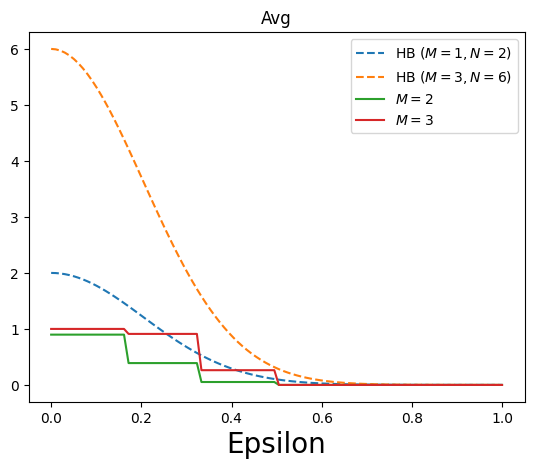

In [9]:
 #Problem 1.7 a
import matplotlib.pyplot as plt
import pandas as pd

def Probabiliy(miu,M,N):
    return 1 - (1 - (1 - miu)**N)**M

d = [{'μ': μ, 'M': M, 'p': Probabiliy(μ, M, N=10)}
     for μ in [0.05, 0.8]
     for M in [1, 1_000, 1_000_000]]

print(d)

 #partb
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')

N = 6
M = 2
μ = 0.5

# defining HB
def hoeffding_bound(ε, N, M=1):
    return 2*M*np.exp(-2*N*ε**2)

def P(N, M, ε_space, μ):
    k = np.random.binomial(n=N,
                           p=μ,
                           size=(1_000, M))
    P = np.abs(k/N - μ).max(axis=1)
    return [(P > ε).mean() for ε in ε_space]

ε_space = np.linspace(0, 1, 100)

plt.plot(ε_space, hoeffding_bound(ε_space, N), '--',
         ε_space, hoeffding_bound(ε_space, N, M=3), '--',
         ε_space, P(6, 2, ε_space, μ),
         ε_space, P(6, 10, ε_space, μ));
#plt.title('Average over $1000$ iterations of\n'
 #         '$\max \{ \mid k_1/6 - 0.5 \mid,'
 #         '\mid k_2/6 - 0.5 \mid\} > \epsilon $\n',
 #         fontsize=20)
plt.title("Avg")
plt.legend(['HB '
            '($M=1, N=2$)',
            'HB '
            '($M=3, N=6$)',
            '$M=2$',
            '$M=3$'])

plt.xlabel('Epsilon', fontsize=20);
